<a href="https://colab.research.google.com/github/mehrnazeraeisi/KnnRegressor_Result/blob/main/Advertising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#   مشاهده نمودارها برای هر درصد دلخواه
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

def evaluate_knn_on_dataset(X_data, y_data, test_size=0.2, n_repeats=20):
    # مرحله 1: محاسبه R² و MSE برای تک‌ویژگی‌ها
    def compute_r2_mse_per_feature(X, y):
        scores = []
        for feature in X.columns:
            model = KNeighborsRegressor()
            model.fit(X[[feature]], y)
            y_pred = model.predict(X[[feature]])
            r2 = r2_score(y, y_pred)
            mse = mean_squared_error(y, y_pred)
            scores.append((feature, r2, mse))
        df_scores = pd.DataFrame(scores, columns=['Feature', 'R2', 'MSE'])
        return df_scores.sort_values(by='R2', ascending=False).reset_index(drop=True)

    # مرحله 2: بررسی گروه‌های افزایشی ویژگی‌ها
    def evaluate_incremental_feature_groups(X, y, sorted_features):
        results = []
        best_r2 = -np.inf
        best_group = []
        for k in range(1, len(sorted_features) + 1):
            group = sorted_features[:k]
            model = KNeighborsRegressor()
            model.fit(X[group], y)
            y_pred = model.predict(X[group])
            r2 = r2_score(y, y_pred)
            mse = mean_squared_error(y, y_pred)
            results.append((k, r2, mse))
            if r2 > best_r2:
                best_r2 = r2
                best_group = group
        # اضافه کردن All Features به لیست
        model.fit(X, y)
        y_pred = model.predict(X)
        all_r2 = r2_score(y, y_pred)
        all_mse = mean_squared_error(y, y_pred)
        results.append(("All Features", all_r2, all_mse))
        return pd.DataFrame(results, columns=["Group Size", "R2 Score", "MSE"]), best_group

    # اجرای مراحل
    single_feat_df = compute_r2_mse_per_feature(X_data, y_data)
    sorted_features = single_feat_df['Feature'].tolist()
    group_results_df, best_group = evaluate_incremental_feature_groups(X_data, y_data, sorted_features)

    # مرحله 3: چاپ نتایج اولیه
    print("📌 نتایج R² و MSE برای هر ویژگی:")
    print(single_feat_df.to_string(index=False))

    print("\n📊 نتایج عملکرد گروه‌های افزایشی (R² و MSE):")
    print(group_results_df.to_string(index=False))

    best_r2 = group_results_df[group_results_df["Group Size"] == len(best_group)]["R2 Score"].values[0]
    best_mse = group_results_df[group_results_df["Group Size"] == len(best_group)]["MSE"].values[0]

    print("\n🏆 بهترین گروه:")
    print(f"📌 تعداد ویژگی‌ها: {len(best_group)}")
    print(f"🔹 R²: {best_r2:.4f}")
    print(f"🔻 MSE: {best_mse:.2f}")

    # مرحله 4: ارزیابی نهایی با Split و رسم نمودار
    r2_scores = {"all_features": [], "best_group": []}
    mse_scores = {"all_features": [], "best_group": []}

    feature_groups = {
        "all_features": X_data.columns.tolist(),
        "best_group": best_group
    }

    for _ in range(n_repeats):
        X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=test_size)
        for group_name, group_features in feature_groups.items():
            model = KNeighborsRegressor()
            model.fit(X_train[group_features], y_train)
            y_pred = model.predict(X_test[group_features])
            r2_scores[group_name].append(r2_score(y_test, y_pred))
            mse_scores[group_name].append(mean_squared_error(y_test, y_pred))

    # رسم نمودار R²
    x = np.arange(1, n_repeats + 1)
    plt.figure(figsize=(8, 4))
    for name, r2 in r2_scores.items():
        plt.plot(x, r2, label=f"{name.replace('_', ' ').title()} R²", marker='o')
    plt.xlabel("Repeat")
    plt.ylabel("R² Score")
    plt.title("KNN Regressor R² Performance")
    plt.legend()
    plt.grid(True)
    plt.show()

    # رسم نمودار MSE
    plt.figure(figsize=(8, 4))
    for name, mse in mse_scores.items():
        plt.plot(x, mse, label=f"{name.replace('_', ' ').title()} MSE", marker='s')
    plt.xlabel("Repeat")
    plt.ylabel("Mean Squared Error")
    plt.title("KNN Regressor MSE Performance")
    plt.legend()
    plt.grid(True)
    plt.show()

    # چاپ نتایج نهایی میانگین
    print("\n📈 میانگین نتایج پس از تکرار:")
    for name in feature_groups:
        avg_r2 = np.mean(r2_scores[name])
        avg_mse = np.mean(mse_scores[name])
        print(f"{name.replace('_', ' ').title()} → R²: {avg_r2:.4f}, MSE: {avg_mse:.2f}")


Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')
      TV  radio  newspaper  sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9
(200, 3)
📌 نتایج R² و MSE برای هر ویژگی:
  Feature       R2       MSE
       TV 0.663212  9.122154
    radio 0.491364 13.776782
newspaper 0.209107 21.421912

📊 نتایج عملکرد گروه‌های افزایشی (R² و MSE):
  Group Size  R2 Score      MSE
           1  0.663212 9.122154
           2  0.976655 0.632320
           3  0.952944 1.274538
All Features  0.952944 1.274538

🏆 بهترین گروه:
📌 تعداد ویژگی‌ها: 2
🔹 R²: 0.9767
🔻 MSE: 0.63


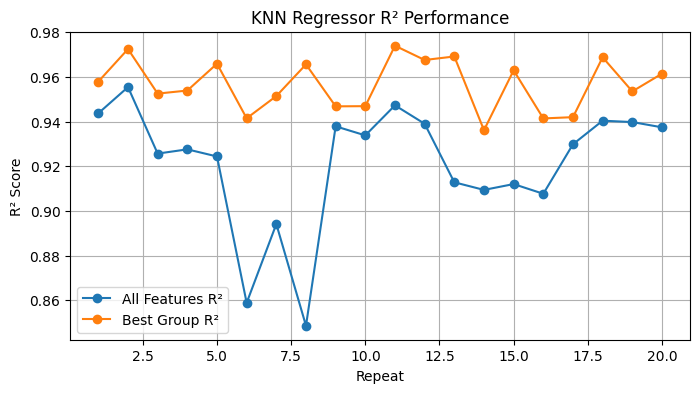

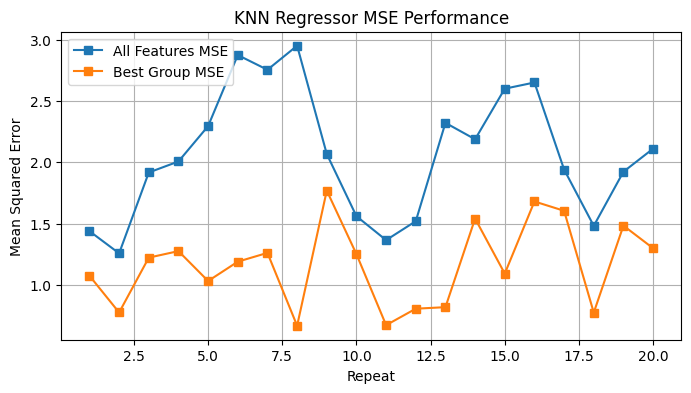


📈 میانگین نتایج پس از تکرار:
All Features → R²: 0.9213, MSE: 2.06
Best Group → R²: 0.9566, MSE: 1.17


In [6]:
# بارگذاری فایل
data = pd.read_csv('advertising.csv')

print(data.columns)
# نمایش اطلاعات
print(data.head())


# جدا کردن ویژگی‌ها و برچسب‌ها
X = data.drop('sales', axis=1)
y= data['sales']

print(X.shape)


# اجرای تابع
evaluate_knn_on_dataset(X, y, test_size=0.2, n_repeats=20)



In [8]:
def knn_detailed_results_table_from_xy(X_data, y_data, test_sizes=[0.1, 0.13, 0.16, 0.19, 0.25], n_repeats=20):
    from sklearn.neighbors import KNeighborsRegressor
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import r2_score, mean_squared_error
    import pandas as pd
    import numpy as np

    feature_names = X_data.columns.tolist()

    # مرحله اول: محاسبه R² برای هر ویژگی
    scores = []
    for feature in feature_names:
        model = KNeighborsRegressor()
        model.fit(X_data[[feature]], y_data)
        y_pred = model.predict(X_data[[feature]])
        r2 = r2_score(y_data, y_pred)
        scores.append((feature, r2))

    df_scores = pd.DataFrame(scores, columns=['Feature', 'R2']).sort_values(by='R2', ascending=False).reset_index(drop=True)

    # پیدا کردن بهترین گروه
    best_r2 = -np.inf
    best_group = []
    for k in range(1, len(df_scores)+1):
        group = df_scores['Feature'][:k].tolist()
        model = KNeighborsRegressor()
        model.fit(X_data[group], y_data)
        y_pred = model.predict(X_data[group])
        r2 = r2_score(y_data, y_pred)
        if r2 > best_r2:
            best_r2 = r2
            best_group = group

    # ذخیره ریز نتایج در جدول
    detailed_results = []
    for ts in test_sizes:
        for repeat in range(1, n_repeats+1):
            X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=ts)

            # مدل روی همه ویژگی‌ها
            model_all = KNeighborsRegressor()
            model_all.fit(X_train, y_train)
            y_pred_all = model_all.predict(X_test)
            r2_all = r2_score(y_test, y_pred_all)
            mse_all = mean_squared_error(y_test, y_pred_all)

            # مدل روی بهترین ویژگی‌ها
            model_modified = KNeighborsRegressor()
            model_modified .fit(X_train[best_group], y_train)
            y_pred_modified  = model_modified .predict(X_test[best_group])
            r2_modified  = r2_score(y_test, y_pred_modified )
            mse_modified  = mean_squared_error(y_test, y_pred_modified )

            detailed_results.append({
                'Test Size': ts,
                'Repeat': repeat,
                'All_R2': r2_all,
                'All_MSE': mse_all,
                'Modified _R2': r2_modified ,
                'Modified _MSE': mse_modified
            })

    return pd.DataFrame(detailed_results)


In [9]:
import pandas as pd

# بارگذاری فایل CSV
data = pd.read_csv('advertising.csv')

# فرض بر این است که ستون هدف "rating" است و بقیه ویژگی‌ها
X = data.drop('sales', axis=1)
y = data['sales']

# اجرای تابع جدول
df_result = knn_detailed_results_table_from_xy(X, y)
print(df_result)


    Test Size  Repeat    All_R2   All_MSE  Modified _R2  Modified _MSE
0        0.10       1  0.973865  0.805780      0.973473       0.817860
1        0.10       2  0.868590  3.905140      0.958084       1.245620
2        0.10       3  0.932010  1.471940      0.957003       0.930860
3        0.10       4  0.959027  0.959440      0.971927       0.657380
4        0.10       5  0.888218  3.601780      0.932061       2.189100
..        ...     ...       ...       ...           ...            ...
95       0.25      16  0.912358  2.050728      0.933359       1.559328
96       0.25      17  0.883558  2.632992      0.928442       1.618080
97       0.25      18  0.936387  1.978712      0.960136       1.239968
98       0.25      19  0.890392  2.249024      0.925926       1.519912
99       0.25      20  0.945225  1.542464      0.976144       0.671784

[100 rows x 6 columns]
